<a href="https://colab.research.google.com/github/johnsuraj194/johnsuraj194/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation Project Using KMeans Clustering Algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

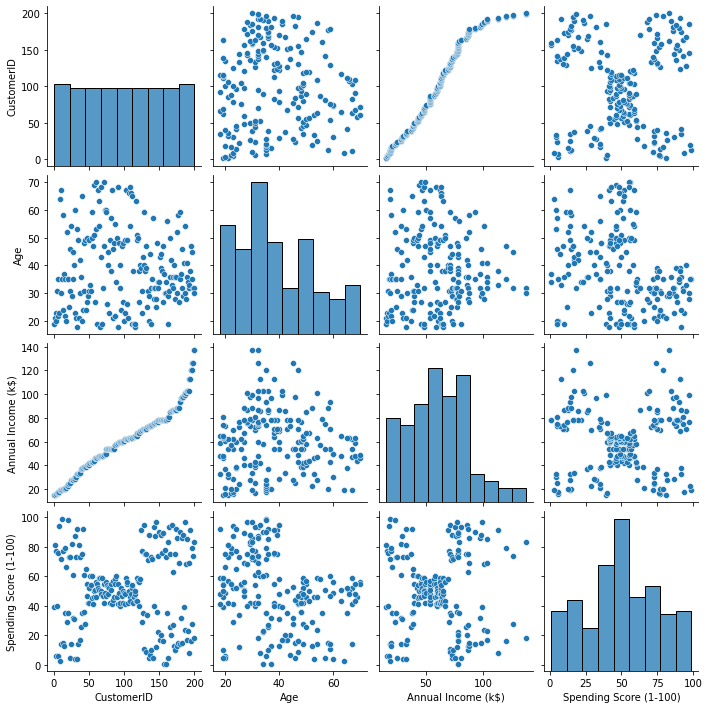

In [6]:
sns.pairplot(df)
plt.show()

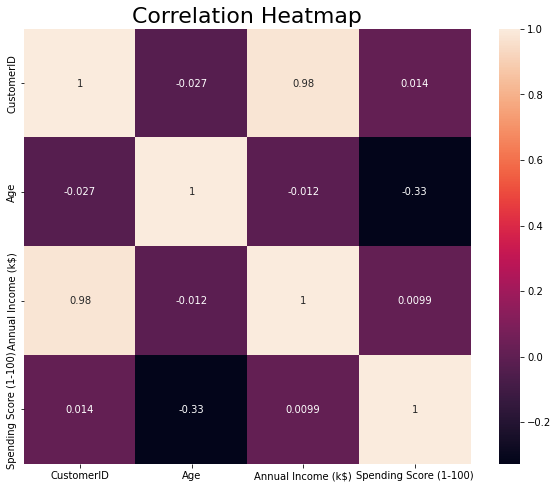

In [7]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap", fontsize = 22)
plt.show()

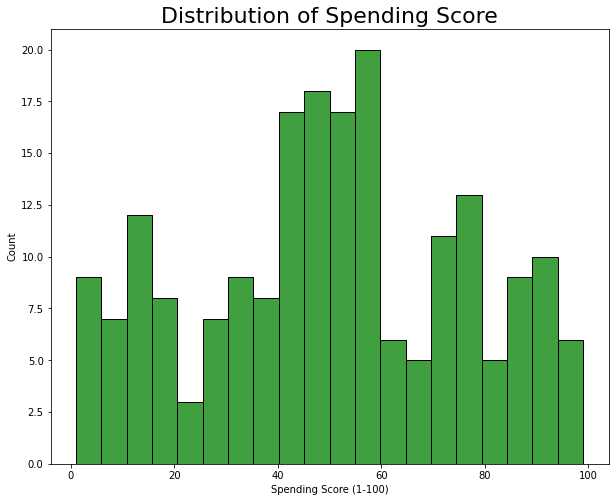

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(df['Spending Score (1-100)'], bins= 20, color='g')
plt.title("Distribution of Spending Score", fontsize = 22)
plt.show()

<Figure size 864x720 with 0 Axes>

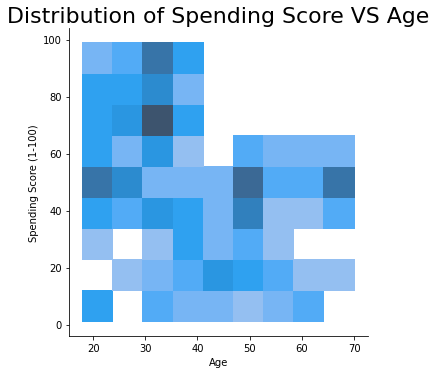

In [9]:
plt.figure(figsize=(12,10))
sns.displot(data= df,y='Spending Score (1-100)',x='Age')
plt.title("Distribution of Spending Score VS Age", fontsize = 22)
plt.show()

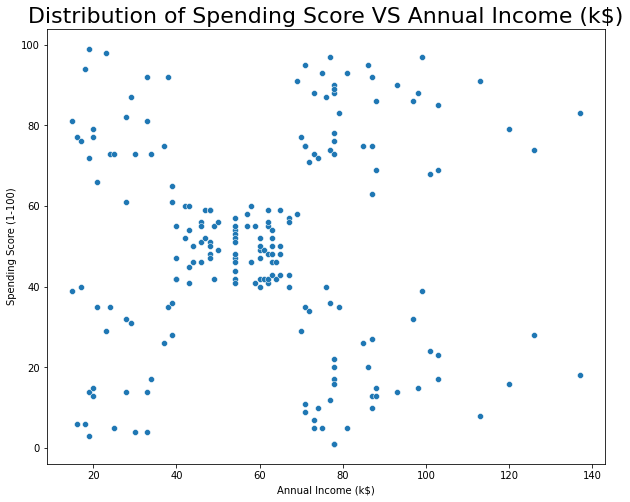

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df,y='Spending Score (1-100)',x='Annual Income (k$)')
plt.title("Distribution of Spending Score VS Annual Income (k$)", fontsize = 22)
plt.show()

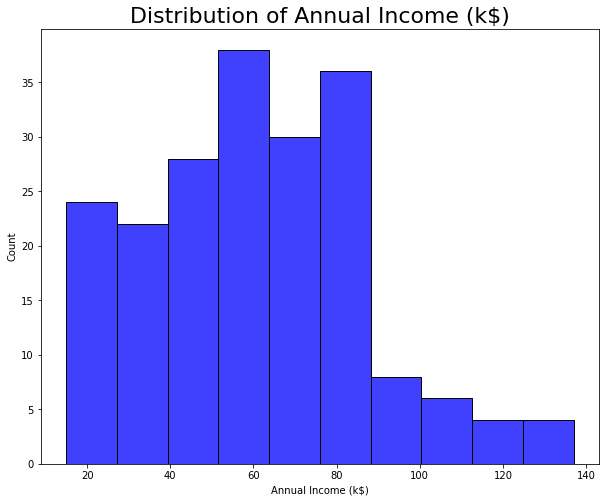

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income (k$)", fontsize = 22)
plt.show()

<Figure size 864x720 with 0 Axes>

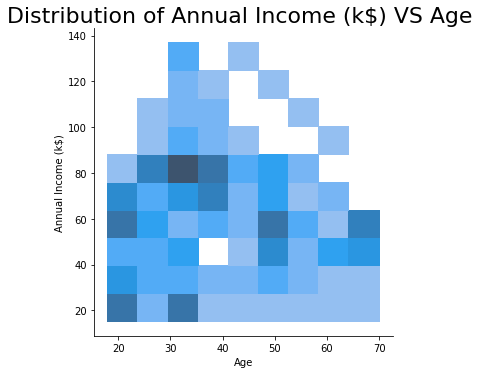

In [12]:
plt.figure(figsize=(12,10))
sns.displot(data= df,y='Annual Income (k$)',x='Age')
plt.title("Distribution of Annual Income (k$) VS Age ", fontsize = 22)
plt.show()

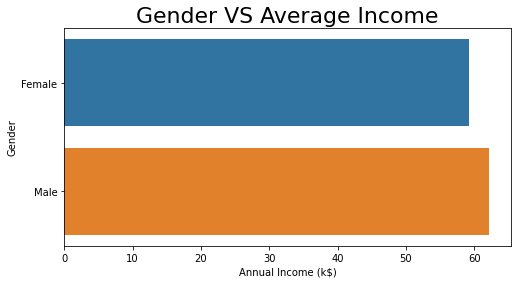

In [13]:
gender_income = df.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data= gender_income, y='Gender', x='Annual Income (k$)')
plt.title("Gender VS Average Income", fontsize = 22)
plt.show()

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.select_dtypes("object").describe()

,Gender
count,200
unique,2
top,Female
freq,112


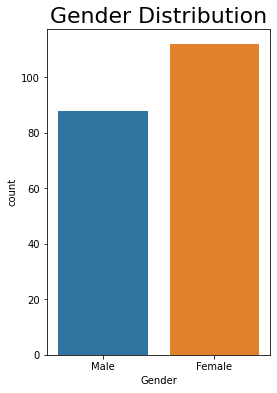

In [16]:
plt.figure(figsize=(4,6))
sns.countplot(df['Gender'])
plt.title("Gender Distribution", fontsize = 22)
plt.show()

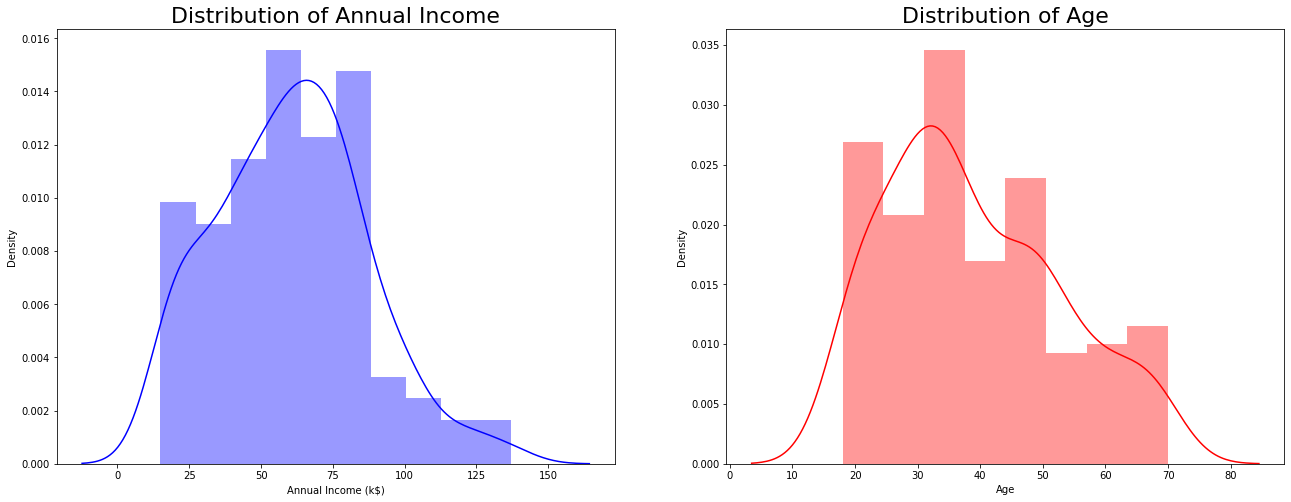

In [17]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income", fontsize = 22)

plt.subplot(1,2,2)
sns.distplot(df['Age'], color='r')
plt.title("Distribution of Age", fontsize = 22)
plt.show()

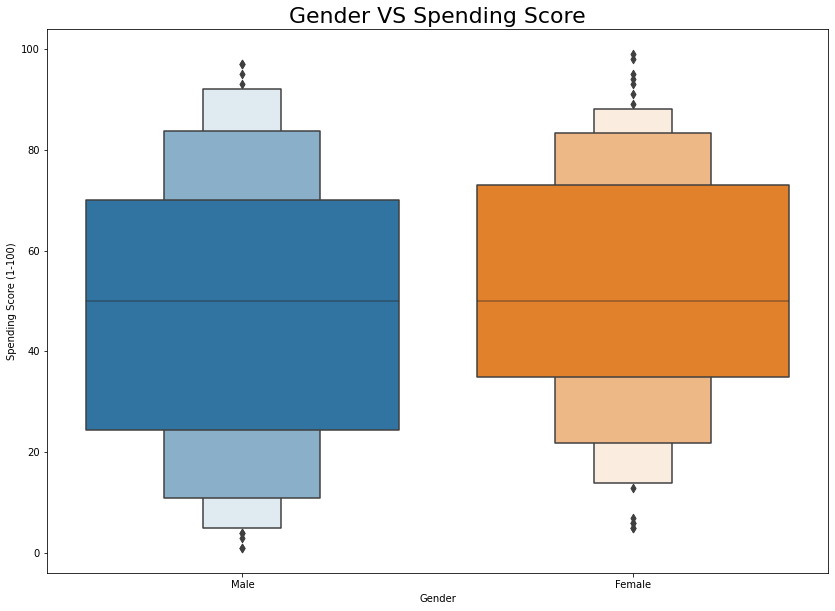

In [18]:
plt.figure(figsize=(14,10))
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'])
plt.title("Gender VS Spending Score", fontsize = 22)
plt.show()

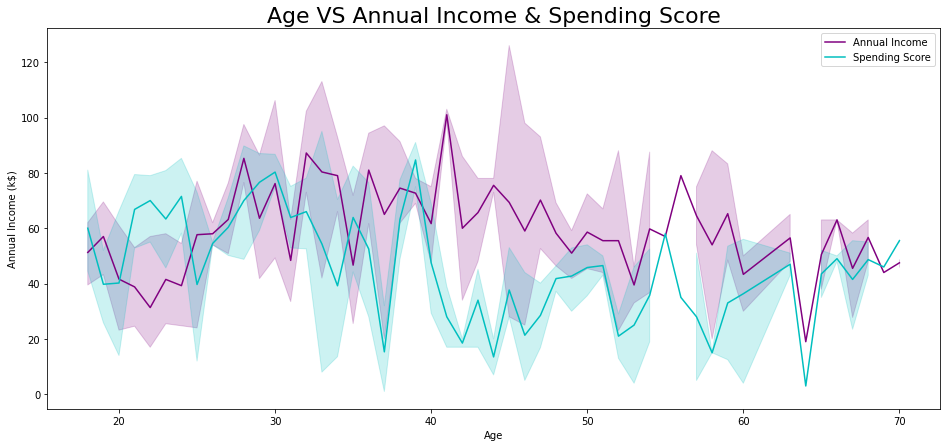

In [19]:
plt.figure(figsize=(16, 7))
x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'purple', label="Annual Income")
sns.lineplot(x, z, color= 'c', label="Spending Score")
plt.title("Age VS Annual Income & Spending Score", fontsize= 22)
plt.legend()
plt.show()

In [20]:
X = df.iloc[:,2:]
X.shape

(200, 3)

Building the Clustering model

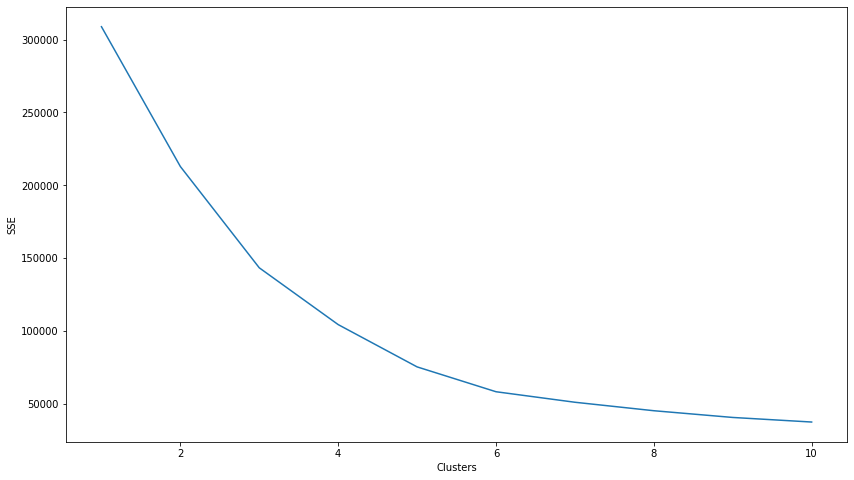

In [21]:
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)

# plotting the Elbow
plt.figure(figsize = (14, 8))
plt.plot(np.arange(1,11), Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [22]:
K_model = KMeans(n_clusters = 3)
K_model.fit(X)

KMeans(n_clusters=3)

In [23]:
clusters = K_model.labels_

In [24]:
X = X.assign(cluster = clusters)
X.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),cluster
108,68,63,43,0
146,48,77,36,1
8,64,19,3,0
162,19,81,5,1
13,24,20,77,0
55,47,43,41,0
79,49,54,42,0
150,43,78,17,1
138,19,74,10,1
28,40,29,31,0


Visualising the clusters

In [25]:
import plotly.express as px

fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))